In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
!pip install pmdarima
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM 
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

In [2]:
df = pd.read_csv("/Users/aameerkhan/Downloads/archive/ADANIPORTS.csv")
df.head(3)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,NaN,1069678,0.2088


In [3]:
df.tail(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

<AxesSubplot: >

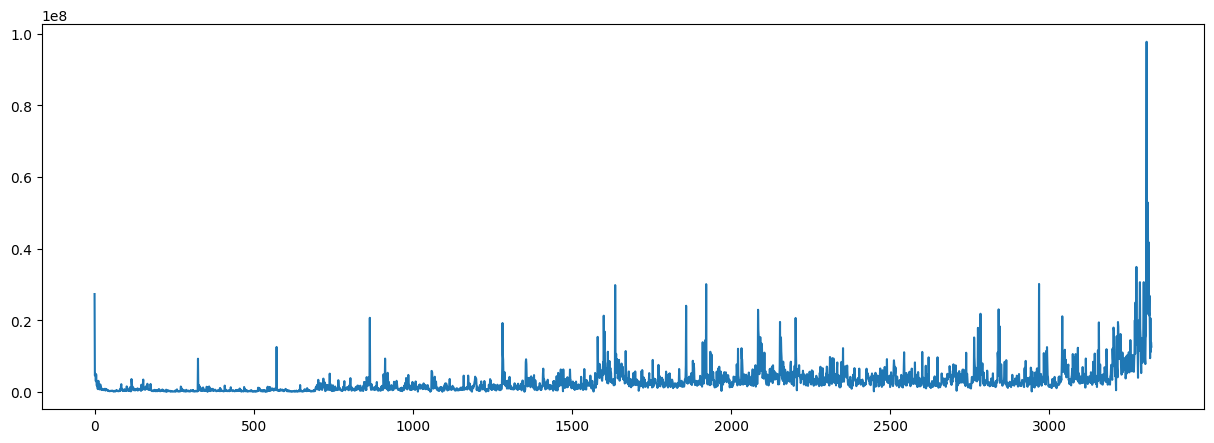

In [5]:
df['Volume'].plot(figsize=(15,5))

In [6]:
data = df[df['Volume']>0]
data.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.0,770.0,1050.00,770.0,959.0,962.9,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.9,984.0,990.00,874.0,885.0,893.9,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.9,909.0,914.75,841.0,887.0,884.2,888.09,5124121,4.550658e+14,NaN,1069678,0.2088


<AxesSubplot: >

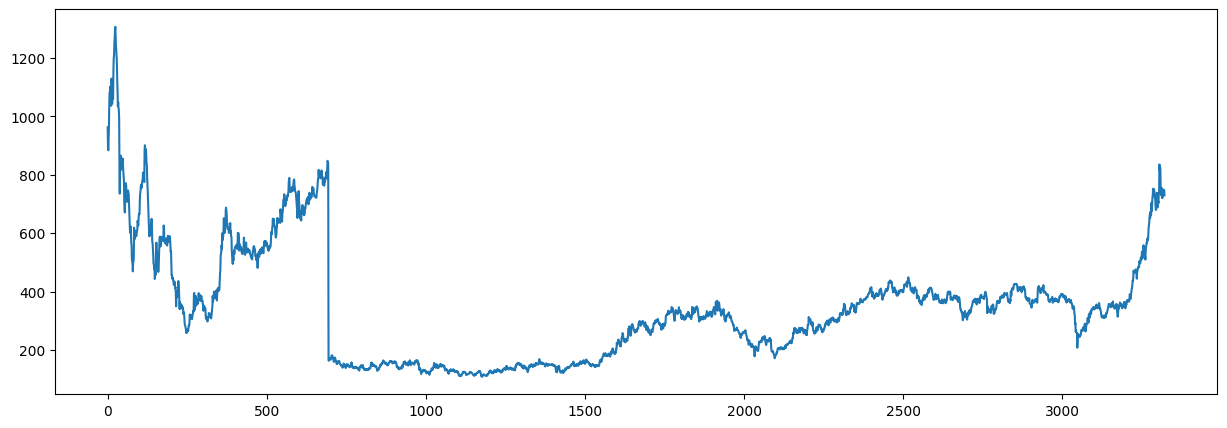

In [7]:
data['Close'].plot(figsize=(15,5))

<AxesSubplot: xlabel='Close', ylabel='Density'>

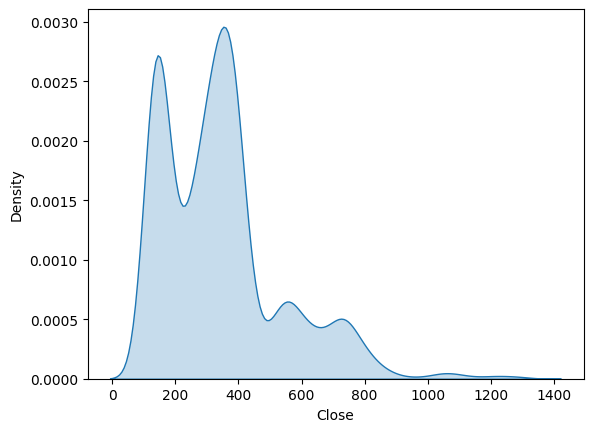

In [8]:
sns.kdeplot(data['Close'], fill=True)

In [9]:

data['Return'] = (data['Prev Close']-data['Open'])/data['Open']

stocks_data = data.copy()

data.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Return
1747,2014-12-18,ADANIPORTS,EQ,273.75,278.00,291.00,277.65,289.80,289.95,286.07,3335626,9.542202e+13,41720.0,1879782,0.5635,-0.015288
2619,2018-06-26,ADANIPORTS,EQ,361.15,361.00,366.55,356.40,361.95,362.90,361.90,1997309,7.228355e+13,43546.0,725459,0.3632,0.000416
1014,2012-01-05,MUNDRAPORT,EQ,122.85,122.00,127.60,121.30,127.00,126.70,125.30,788405,9.878425e+12,10614.0,315199,0.3998,0.006967
2577,2018-04-26,ADANIPORTS,EQ,391.90,388.65,398.50,388.10,396.70,397.10,393.86,3663748,1.443000e+14,89515.0,1485049,0.4053,0.008362
2846,2019-05-30,ADANIPORTS,EQ,406.55,406.55,411.80,401.60,409.00,409.30,407.31,5598272,2.280257e+14,47254.0,3139799,0.5609,0.000000


In [10]:
fig = px.line(data,x="Date",y="Close",title="Closing Price: Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")])))

In [11]:

fig = px.line(data,x="Date",y="Return",title="Returns : Range Slider and Selectors")
fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(
    buttons=list([
        dict(count=1,label="1m",step="month",stepmode="backward"),
        dict(count=6,label="6m",step="month",stepmode="backward"),
        dict(count=1,label="YTD",step="year",stepmode="todate"),
        dict(count=1,label="1y",step="year",stepmode="backward"),
        dict(step="all")
])))

In [12]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                    open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()

In [13]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [14]:
fig = go.Figure()
data['Volume_M'] = data["Volume"].asfreq('d')
data['Lag_Volume_M'] = data['Volume'].asfreq('d').shift(10)



In [15]:
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()
fig = make_subplots(rows=2, cols=1)

#OHLC Plot
fig.add_trace(go.Ohlc(x=data.Date, open=data.Open, high=data.High, low=data.Low, close=data.Close, name='Price'),row=1, col=1)
#Volume PLot
fig.add_trace(go.Scatter(x=data.Date, y=data.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [16]:
fig = go.Figure()
data['Close_M'] = data["Close"].asfreq('d')
data['Lag_Close_M'] = data['Close'].asfreq('d').shift(10)


In [17]:
def RSI(df,n=14):
    close = df['Close']
    delta = close.diff()
    delta = delta[1:]
    pricesUp = delta.copy()
    pricesDown = delta.copy()
    pricesUp[pricesUp<0]=0
    pricesDown[pricesDown>0]=0
    rollUp = pricesUp.rolling(n).mean()
    rollDown = pricesDown.abs().rolling(n).mean()
    rs = rollUp/rollDown
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

data['RSI'] = RSI(df).fillna(0)

fig = go.Figure(go.Scatter(x=data.Date,y=data.RSI,name='RSI'))
fig.show()

In [18]:
data['EMA_12'] = pd.Series(data['Close'].ewm(span=12).mean())
data['EMA_26'] = pd.Series(data['Close'].ewm(span=26).mean())
data['MACD'] = pd.Series(data['EMA_12'] - data['EMA_26'])
data['MACD_signal'] = pd.Series(data.MACD.ewm(span=9,min_periods=9).mean())

fig = go.Figure()
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD,name='MACD'))
fig.add_trace(go.Scatter(x=data.Date,y=data.MACD_signal,name='MACD_signal'))
fig.show()

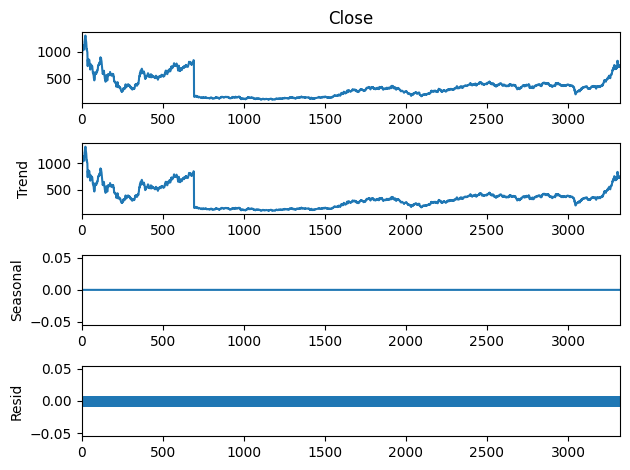

In [19]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=1) # The frequncy is daily
figure = result.plot()

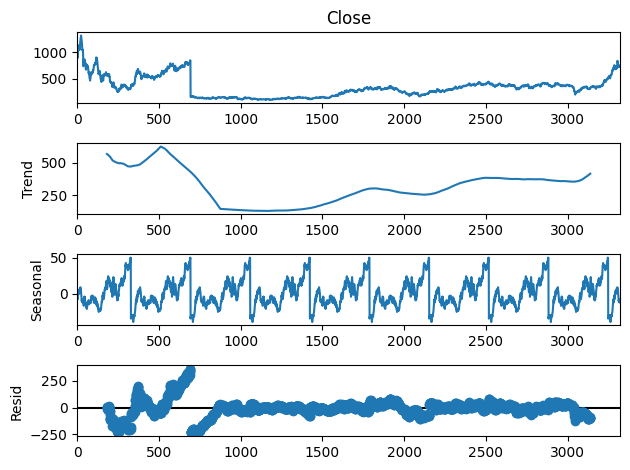

In [20]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=365) # The frequncy is yearly
figure = result.plot()

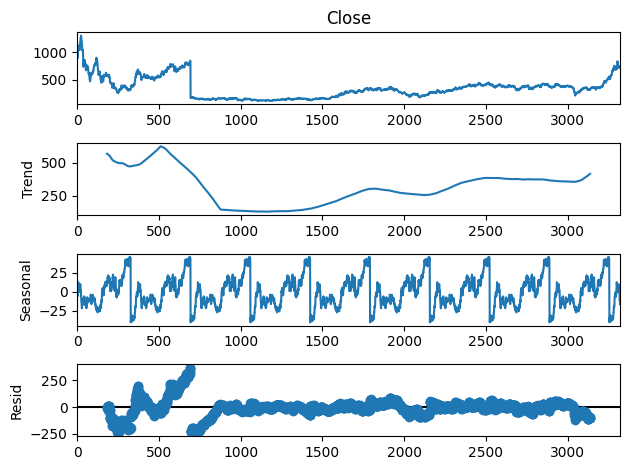

In [21]:
series = data.Close
result = seasonal_decompose(series, model='additive',period=366) # The frequncy is yearly
figure = result.plot()

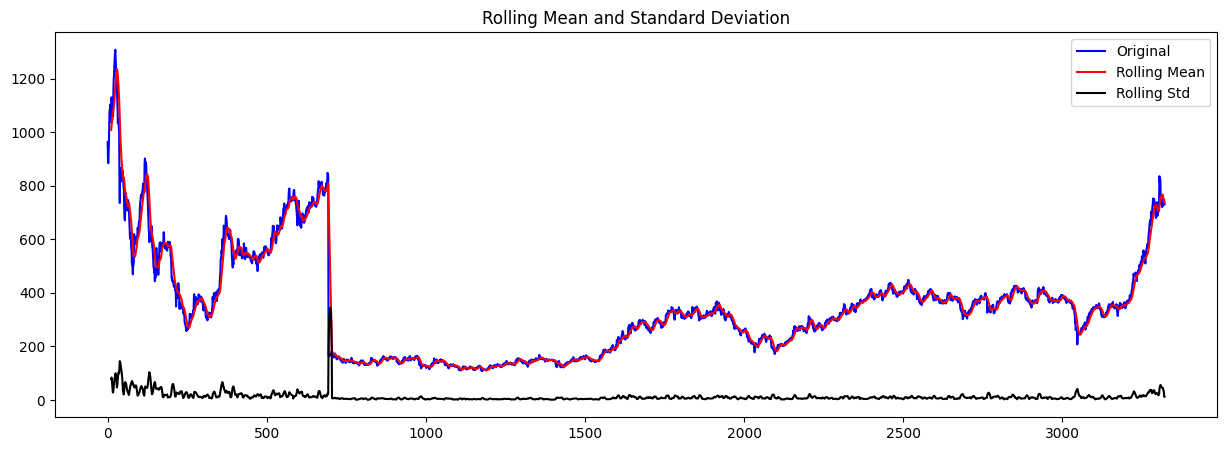

Results of dickey fuller test
Test Statistics                  -3.473098
p-value                           0.008705
No. of lags used                  5.000000
Number of observations used    3316.000000
dtype: float64


In [22]:
#Test for staionarity
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    print(output)

test_stationarity(data['Close'])  

In [23]:
data['Stocks First Difference']=data['Close']-data['Close'].shift(1)
data['Stocks Seasonal Difference']=data['Close']-data['Close'].shift(12)
data['Stocks Seasonal+Daily Difference']=data['Stocks Seasonal Difference']-data['Stocks Seasonal Difference'].shift(1)

In [24]:
adft = adfuller(data['Stocks First Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -25.916549
p-value                           0.000000
No. of lags used                  4.000000
Number of observations used    3316.000000
dtype: float64


In [25]:
adft = adfuller(data['Stocks Seasonal Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -9.821966e+00
p-value                        5.308752e-17
No. of lags used               2.900000e+01
Number of observations used    3.280000e+03
dtype: float64


In [26]:
adft = adfuller(data['Stocks Seasonal+Daily Difference'].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics                 -19.672054
p-value                           0.000000
No. of lags used                 23.000000
Number of observations used    3285.000000
dtype: float64


<AxesSubplot: >

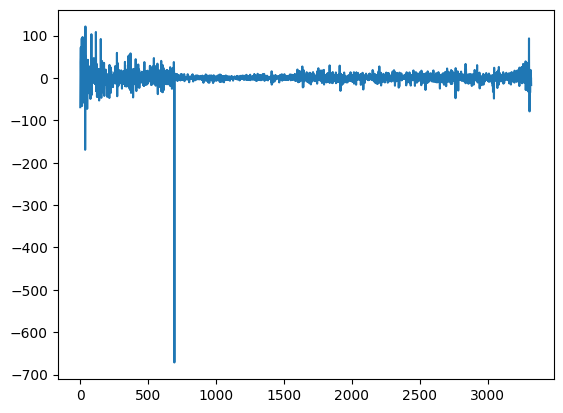

In [27]:
data['Stocks First Difference'].plot()

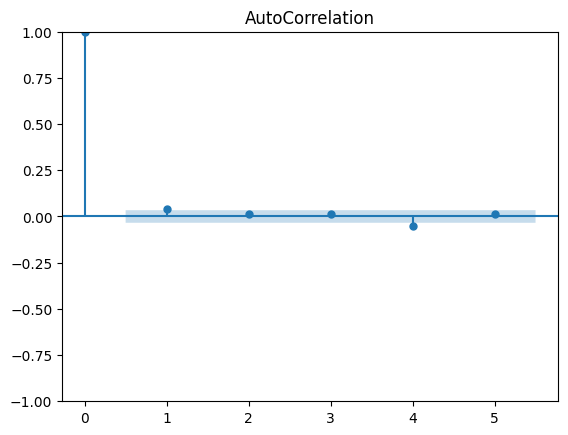

In [28]:
plot_acf(data["Stocks First Difference"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

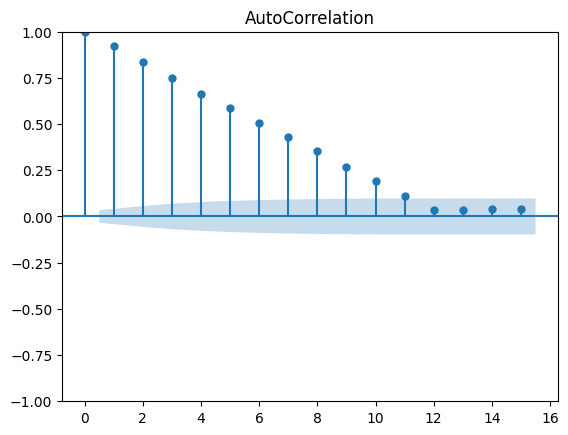

In [29]:
plot_acf(data["Stocks Seasonal Difference"].dropna(),lags=15,title="AutoCorrelation")
plt.show()

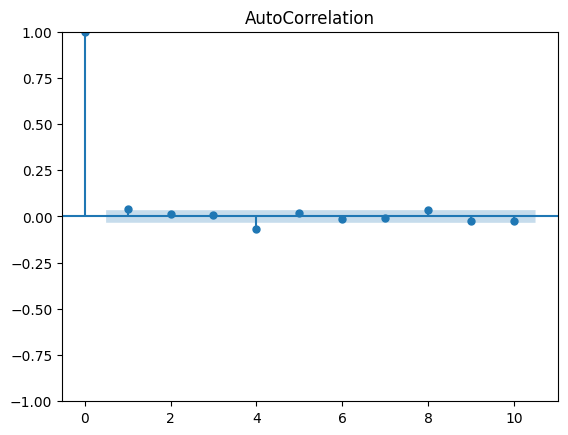

In [30]:
plot_acf(data["Stocks Seasonal+Daily Difference"].dropna(),lags=10,title="AutoCorrelation")
plt.show()

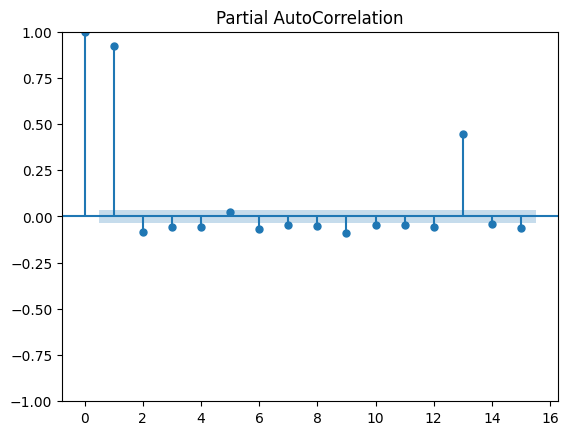

In [31]:
plot_pacf(data["Stocks Seasonal Difference"].dropna(),method='ywm',lags=15,title="Partial AutoCorrelation")
plt.show()

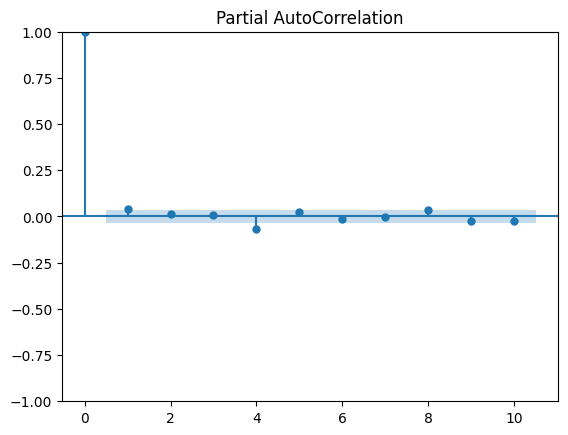

In [32]:
plot_pacf(data["Stocks Seasonal+Daily Difference"].dropna(),method='ywm',lags=10,title="Partial AutoCorrelation")
plt.show()

In [33]:
stocks_data=stocks_data[stocks_data.Date > "2015"]
df_train = stocks_data[stocks_data.Date < "2019"]
df_valid = stocks_data[stocks_data.Date >= "2019"]

In [34]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [35]:
history = [x for x in train]
predictions = list()

# walk-forward validation


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6582.420, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6583.448, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6583.395, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6580.523, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6582.610, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.487 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  989
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3289.262
Date:                Mon, 27 Feb 2023   AIC                           6580.523
Time:                        20:16:00   BIC                           6585.419
Sample:                             0   HQIC                          6582.385
                                - 989                                       

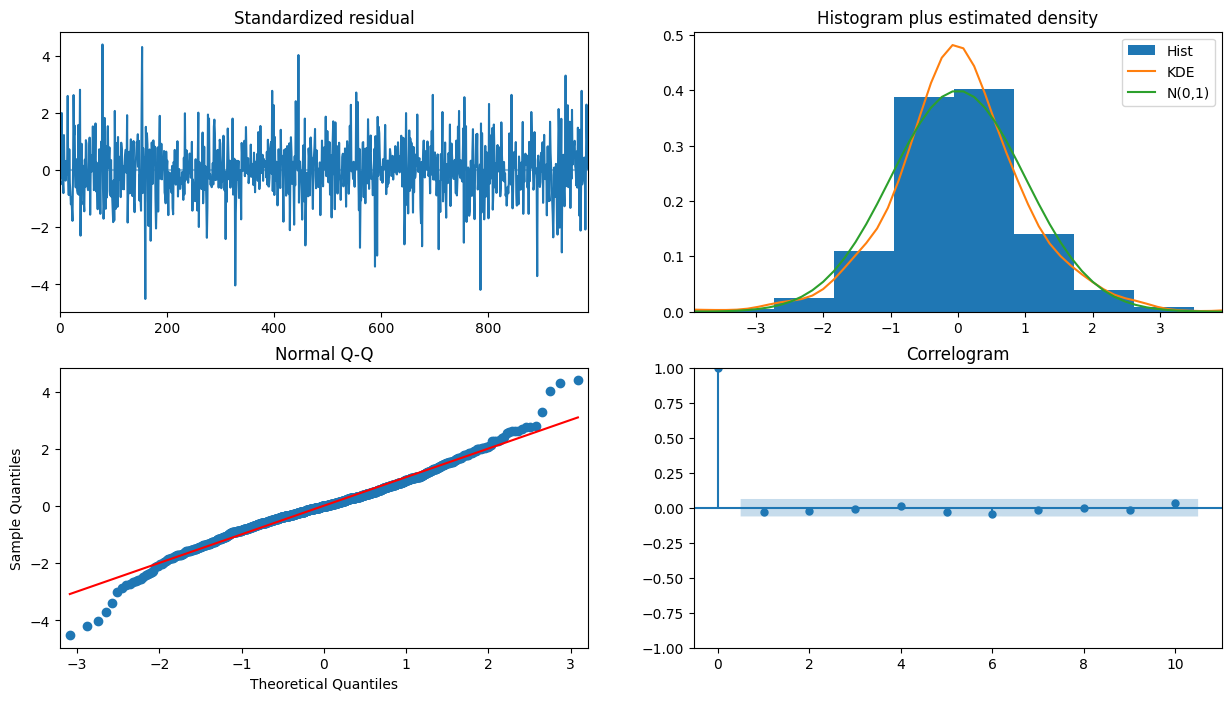

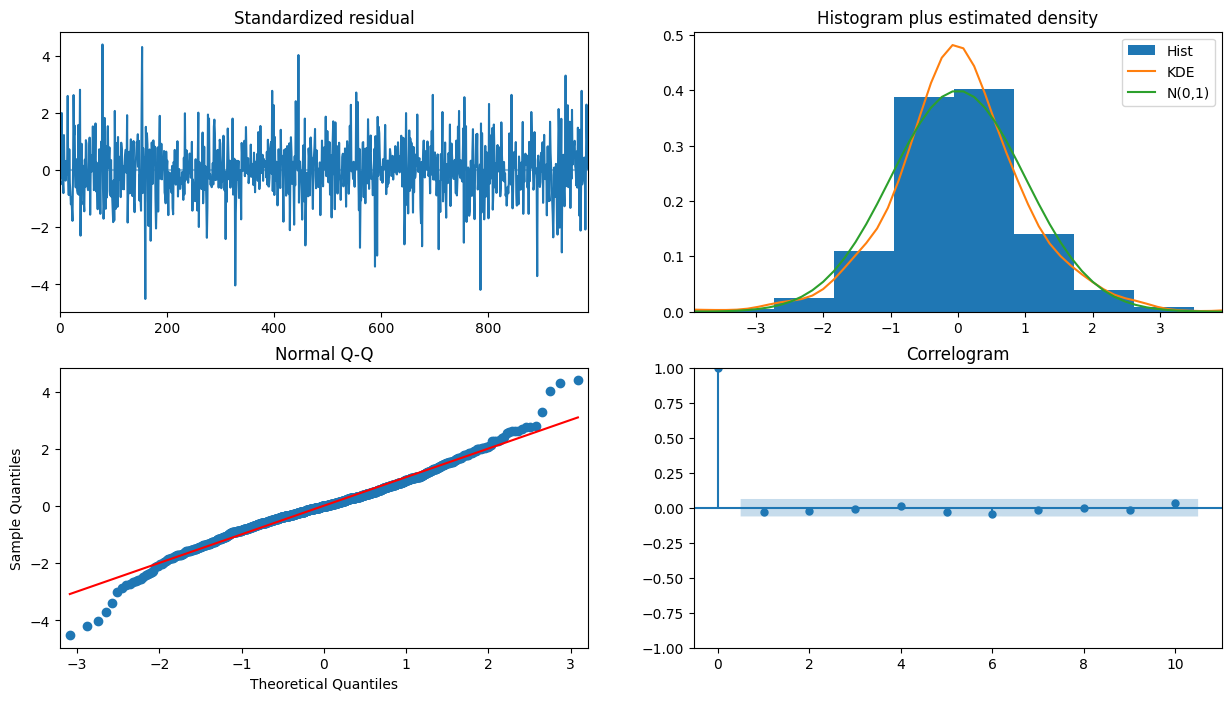

In [36]:
    model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    print(model_autoARIMA.summary())
    model_autoARIMA.plot_diagnostics(figsize=(15,8))
    


In [37]:
y_pred = model_autoARIMA.predict(n_periods=12)
y_pred

array([387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7, 387.7,
       387.7, 387.7, 387.7])

In [38]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(df_valid)):
    model = ARIMA(history, order=(1,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [39]:
test.shape

(577,)

In [40]:
len(predictions)

577

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

In [42]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [43]:
differenced = difference(train)
model=ARIMA(differenced,order=(2,1,2))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

In [44]:
# evaluate forecasts
rolling_mse = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % rolling_mse)

Test MSE: 118.707


In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

In [46]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [47]:
differenced = difference(train)
model=ARIMA(differenced,order=(2,1,2))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

In [48]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat)
    history.append(inverted)
    predicted_results.append(inverted)

In [49]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [50]:
mse_daily = mean_squared_error(df_valid['Close'],predicted_results)
print('Test MSE: %.3f' %mse_daily)

Test MSE: 11790.823


In [51]:
days_in_year=365
differenced = difference(train,days_in_year)
model=ARIMA(differenced,order=(10,1,4))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [52]:
history = [x for x in train]
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    history.append(inverted)
    predicted_results.append(inverted)

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [54]:
mse_seasonal = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_seasonal)

Test MSE: 11544.926


In [55]:
days_in_year=365
differenced_S = difference(train,days_in_year)
differenced = difference(differenced_S)
model=ARIMA(differenced,order=(5,2,5))
model_fit=model.fit()
start=len(train)
end=len(train)+len(test)-1
forecast = model_fit.predict(start=start,end=end)

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/aameerkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [56]:
history = [x for x in train]
predicted_results = list()


interval=366
for yhat in forecast:
    inverted = inverse_difference(history, yhat, interval)
    history.append(inverted)
    predicted_results.append(inverted)

In [57]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_results,name='Forecast_ARIMA'))
fig.show()

In [58]:

mse_sd = mean_squared_error(test, predicted_results)
print('Test MSE: %.3f' % mse_sd)

Test MSE: 12678.174


In [59]:
models = ['Rolling ARIMA','ARIMA']
lst_acc = [rolling_mse,mse_seasonal]
MSE = pd.DataFrame({'Model': models, 'Mean Squared Error': lst_acc})
MSE.sort_values(by="Mean Squared Error")

,Model,Mean Squared Error
0,Rolling ARIMA,118.707243
1,ARIMA,11544.926101
